# Análise exploratória de dados espaciais

<br>
Municípios pobres tendem a estar próximos de municípios pobres ou de municípios ricos? O objetivo da análise exploratória de dados espaciais (AEDE) é responder a esse tipo de questão. De forma mais geral, a questão é qual a a associação entre o valor de certa variável em um lugar e os valores dessa mesma variável nos lugares vizinhos. Localidades com valores semelhantes de determinada variável tendem a estar próximas? Para isso, ela mede a autocorrelação espacial, por meio do I de Moran.

In [1]:
%matplotlib inline 
                    # para os gráficos aparecerem
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gp
import pysal as ps
import palettable
import nupis

plt.style.use('seaborn-whitegrid')

In [18]:
ssm = nupis.mesclar_shp_df(shp='ssm.shp', df='atlas.csv')  # juntar shapefile com dataframe
w = ps.queen_from_shapefile('ssm.shp')   # cria a matriz de vizinhança no formato queen

In [5]:
ssm.shape

(146, 83)

Fazer mapa temático (escolher uma variável para representar no mapa):
- scheme - equal_interval ou quantiles
- número de categorias k
- cmap - cor do mapa (abaixo)

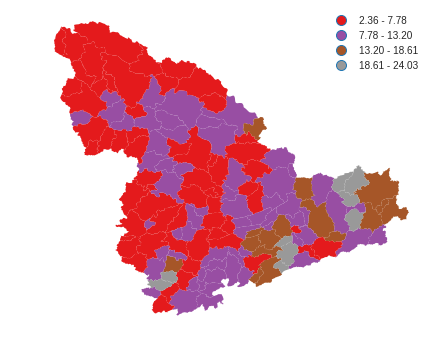

In [6]:
# intervalos iguais
ax = ssm.plot(column='pmpob', scheme='equal_interval', k=4,
             linewidth=0, figsize=(7,7), legend=True, cmap='Set1')
ax.set_axis_off();

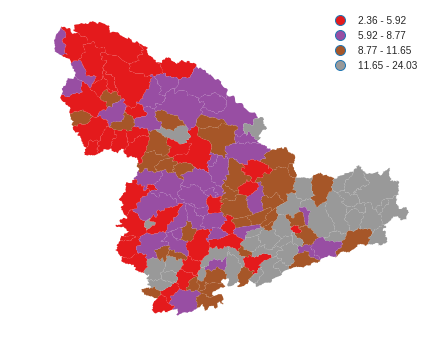

In [7]:
# quantis
ax = ssm.plot(column='pmpob', scheme='quantiles', k=4,
             linewidth=0, figsize=(7,7), legend=True, cmap='Set1')
ax.set_axis_off();

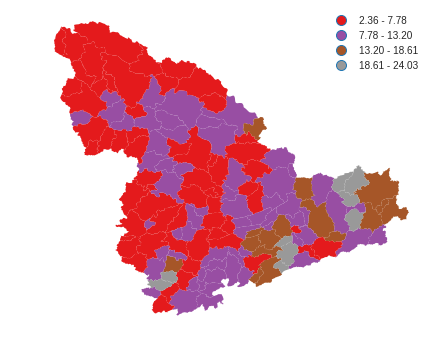

In [8]:
# opção do pacote nupis - já define alguns valores como padrão
nupis.mapa(ssm, 'pmpob')  # mapa com os valores da variável, mapa temático

### I de Moran

Estatística mais utilizada para medir a autocorrelação espacial. Ela mede a relação do desvio padronizado de uma variável numa área com o desvio padronizado das áreas vizinhas para a mesma variável:

$$I=\frac{N}{S_{0}}\frac{\displaystyle\sum_{i=1}^{n}\sum_{j=1}^{n}w_{ij}z_{i}z_{j}}{\displaystyle\sum_{i=1}^{n}z^{2}_{i}},$$
em que:

- $z_i = y_i - \bar{y}$ representa o desvio em relação à média da variável.
- $y_i$: valor da variável em um determinado local $i$
- $N$: número de observações
- $S_0 = \sum\sum w_{ij}$
- $E[I] = -1/(N - 1) \approx 0$
            
Se o valor-$p$ referente ao teste do $I$ de Moran for significativo, podemos olhar para o valor da estatística $I$ e concluir:

- $I > 0$: autocorrelação espacial positiva (*clusters* espaciais - HH, LL)
- $I < 0$: autocorrelação espacial negativa (*outliers* espaciais - HL, LH)

In [9]:
# obtenção do I de Moran global para a variável pmpob
IM = ps.Moran(ssm.pmpob, w)  # variável no dataframe e matriz de vizinhança 
nupis.moran_resumo(IM)   # função do nupis que retorna uma saída organizada do I de Moran

Moran Rate Summary Report
I        0.486   observed value of Moran’s I
EI_sim   -0.006   average value of I from permutations  
p_sim     0.001   p-value based on permutations


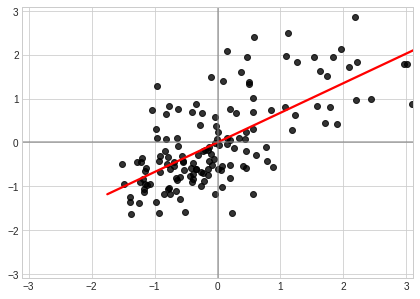

In [10]:
# diagrama de dispersão de Moran
nupis.moran_dispersao(IM)   # recebe o objeto IM, como valor de I de Moran criado antes

Modificar os títulos dos eixos no diagrama de dispersão de Moran.

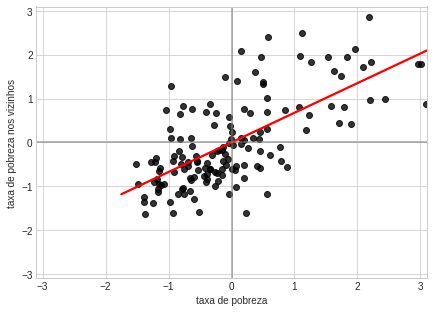

In [11]:
nupis.moran_dispersao(IM, xlabel='taxa de pobreza', ylabel='taxa de pobreza nos vizinhos')

### LISA

- Estatística para detectar padrões locais de autocorrelação espacial: *Local Indicator of Spatial Association* (LISA), ou $I$ de Moran local  
- Permite verificar se há agrupamentos espaciais estatisticamente significativos
- Útil quando a estatística $I$ de Moran global for significativa

$$I_{i}=z_{i}\sum_{j=1}^{j}w_{ij}y_{j}$$  

In [12]:
nupis.lisa_mapa??

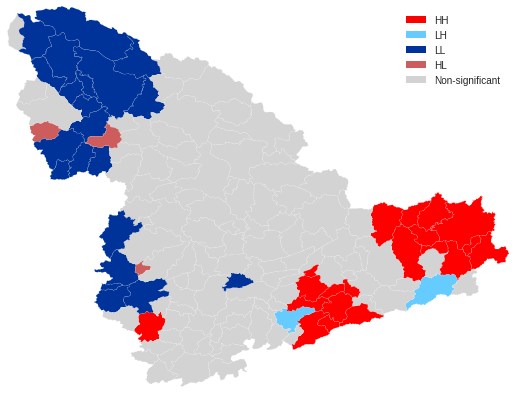

In [13]:
nupis.lisa_mapa(ssm.pmpob, 'ssm.shp', p_thres=0.05)   # função do nupis para obter o mapa LISA

Escolher outra paleta de cor para o choropleth.

In [14]:
x = palettable.wesanderson.Cavalcanti_5_r.mpl_colormap

as paletas disponíveis estão [aqui](https://jiffyclub.github.io/palettable/#finding-palettes). 

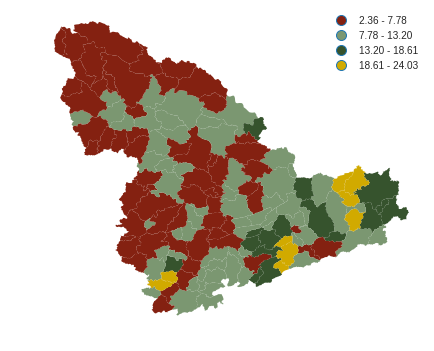

In [15]:
nupis.mapa(ssm, 'pmpob', cmap=x)

<br>
<br>
Calcular o I de Moran para mais de uma variável.

In [16]:
# I de Moran para mais variáveis 
nupis.moran_df(ssm[['pmpob', 'vab_agro', 'pibpc']], w)

,variavel,valor
0,pmpob,0.486010
1,vab_agro,0.238375
2,pibpc,0.036448


In [17]:
# I de Moran para todas as variáveis do atlas
nupis.moran_df(ssm[['mort1', 'razdep', 't_env', 'e_anosestudo', 't_analf25m', 't_flbas',
       't_flfund', 't_flmed', 't_flpre', 't_flsuper', 'pind', 'pmpob',
       'pren10ricos', 'pren20', 'pren20ricos', 'pren40', 'pren60', 'pren80',
       'r1040', 'r2040', 'rdpc', 'cpr', 'emp', 'p_agro', 'p_com', 'p_constr',
       'p_extr', 'p_formal', 'p_fund', 'p_med', 'p_serv', 'p_siup', 'p_super',
       'p_transf', 'ren0', 'ren1', 'ren2', 'ren3', 'ren5', 'renocup', 'trabcc',
       'trabpub', 'trabsc', 't_agua', 't_banagua', 't_dens', 't_lixo', 't_luz',
       'parede', 't_m10a14cf', 't_m15a17cf', 't_mulchefefif014',
       't_nestuda_ntrab_mmeio', 't_des', 't_fund25m', 't_med25m', 't_super25m',
       't_ativ', 't_urb', 'popul', 'porte', 'vab_agro', 'vab_ind', 'vab_serv',
       'vab_adm', 'vab_total', 'impostos', 'pib', 'pibpc']], w)

,variavel,valor
47,t_luz,0.544132
11,pmpob,0.486010
57,t_ativ,0.403860
43,t_agua,0.366659
21,cpr,0.357031
52,t_nestuda_ntrab_mmeio,0.355656
25,p_constr,0.327990
10,pind,0.324073
45,t_dens,0.322672
35,ren1,0.317226
